# Word Exploration and Visuals

This section dives into what the most commonly used words between the two groups were, and where those differences lie. This is also where visualizations are generated for use in presentation of the model. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.feature_extraction.text import CountVectorizer

In [25]:
train = pd.read_csv("./train.csv")

test = pd.read_csv("./test.csv")

### Word Population Comparison

Here I compare the most common words (excluding stop words) from r/Relationships and r/AbusiveRelationships. 

In [29]:
# transform with CountVectorizer
X_train = train["text"]

cvec = CountVectorizer(stop_words = "english", ngram_range = (1, 2))

cvec.fit(X_train)

X_train = cvec.transform(X_train)

# turn into dataframe with column indicating the subreddit
train_df = pd.DataFrame(X_train.toarray(), columns = cvec.get_feature_names())

train_df = train_df.merge(train["abusive_relationship"], right_index = True, left_index = True)

In [33]:
# divide dataframe 
train_df_abuse = train_df[train_df["abusive_relationship"] == 1]

train_df_relationship = train_df[train_df["abusive_relationship"] == 0]

In [75]:
# create dataframes of words and frequencies in each group 
columns = list(train_df.columns)

columns.remove("abusive_relationship")

abuse_words = {"words": columns}

relationship_words = {"words": columns}

abuse_words_counts = []

relationship_words_counts = []

for c in columns:
    abuse_words_counts.append(train_df_abuse[f"{c}"].sum())
    relationship_words_counts.append(train_df_relationship[f"{c}"].sum())
    
abuse_words["frequency"] = abuse_words_counts
relationship_words["frequency"] = relationship_words_counts

abuse_words_df = pd.DataFrame(abuse_words)
relationship_words_df = pd.DataFrame(relationship_words)


In [76]:
# target 300 most common words in abusive relationships 
abuse_words_df.sort_values(by = "frequency", inplace = True, ascending = False)

abuse_words_df.reset_index(drop = True, inplace = True)

abuse_words_300 = list(abuse_words_df["words"][:300])

In [77]:
# target 300 most common words in non-abusive relationships
relationship_words_df.sort_values(by = "frequency", inplace = True, ascending = False)

relationship_words_df.reset_index(drop = True, inplace = True)

relationship_words_300 = list(relationship_words_df["words"][:300])

In [78]:
# find words that do not overlap 
abuse_positive = [w for w in abuse_words_300 if w not in relationship_words_300]

abuse_negative = [w for w in relationship_words_300 if w not in abuse_words_300]

In [100]:
# create dataframes of frequencies for words that do not overlap
abuse_positive_dict = {"words": abuse_positive} 

abuse_positive_counts = []

for word in abuse_positive: 
    abuse_positive_counts.append(abuse_words_df[abuse_words_df["words"] == word]["frequency"].item())
    
abuse_positive_dict["frequency"] = abuse_positive_counts
    
    
abuse_negative_dict = {"words": abuse_negative}

abuse_negative_counts = []

for word in abuse_negative: 
    abuse_negative_counts.append(relationship_words_df[relationship_words_df["words"] == word]["frequency"].item())
    
abuse_negative_dict["frequency"] = abuse_negative_counts
    
    
abuse_positive_df = pd.DataFrame(abuse_positive_dict)
abuse_negative_df = pd.DataFrame(abuse_negative_dict)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: `item` has been deprecated and will be removed in a future version
  app.launch_new_instance()


In [101]:
# display most frequent words that do not overlap: abuse positive

abuse_positive_df.sort_values(by = "frequency", inplace = True, ascending = False)

abuse_positive_df.reset_index(drop = True, inplace = True)

abuse_positive_df.iloc[:30]

,words,frequency
0,abusive,506
1,abuse,295
2,abusive relationship,155
3,hit,132
4,emotionally,129
5,scared,129
6,face,118
7,abuser,118
8,self,89
9,kill,88


In [102]:
# display most frequent words that do not overlap: abuse negative

abuse_negative_df.sort_values(by = "frequency", inplace = True, ascending = False)

abuse_negative_df.reset_index(drop = True, inplace = True)

abuse_negative_df.iloc[:30]

,words,frequency
0,dr,590
1,tl dr,585
2,tl,585
3,wife,439
4,sister,324
5,bf,231
6,christmas,214
7,daughter,191
8,brother,182
9,amp x200b,181


In [141]:
# find words that do overlap 

overlap_words = [w for w in abuse_words_300 if w in relationship_words_300]

overlap_dict = {"words" : overlap_words}

overlap_counts_abuse = []
overlap_counts_nonabuse = []

for word in overlap_words: 
    overlap_counts_abuse.append(abuse_words_df[abuse_words_df["words"] == word]["frequency"].item())
    overlap_counts_nonabuse.append(relationship_words_df[relationship_words_df["words"] == word]["frequency"].item())
    
overlap_dict["abuse"] = overlap_counts_abuse
overlap_dict["nonabuse"] = overlap_counts_nonabuse

overlap_df = pd.DataFrame(overlap_dict)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `item` has been deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: `item` has been deprecated and will be removed in a future version
  if sys.path[0] == '':


In [144]:
# showing most common overlap words by abuse

overlap_df.sort_values(by = "abuse", ascending = False, inplace = True) 

overlap_df[:30]

,words,abuse,nonabuse
0,wa,2670,4041
1,just,1000,1976
2,like,926,1999
3,time,856,1526
4,know,797,1415
5,feel,769,1255
6,don,734,1580
7,relationship,725,861
8,thing,674,1084
9,year,670,1613


In [145]:
# showing most common overlap words by nonbause 

overlap_df.sort_values(by = "nonabuse", ascending = False, inplace = True)

overlap_df[:30]

,words,abuse,nonabuse
0,wa,2670,4041
2,like,926,1999
1,just,1000,1976
9,year,670,1613
10,want,620,1612
6,don,734,1580
3,time,856,1526
13,ha,516,1429
4,know,797,1415
5,feel,769,1255


#### Visualizations

In [109]:
# most common words from r/AbusiveRelationships, frequency compared to r/Relationships 

abuse_top30 = abuse_words_df[:30]

nonabuse_frequency = []
for word in abuse_top30["words"]: 
    nonabuse_frequency.append(relationship_words_df[relationship_words_df["words"] == word]["frequency"].item())

abuse_top30["nonabuse"] = nonabuse_frequency

abuse_top30.rename(columns = {"frequency": "abuse"}, inplace = True)




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `item` has been deprecated and will be removed in a future version
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


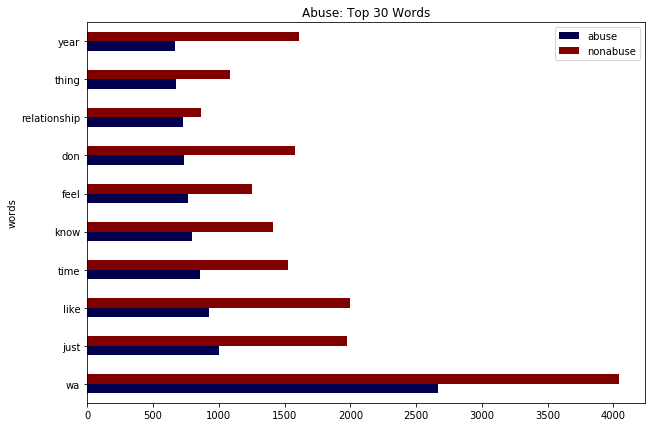

In [134]:


abuse_top30[:10].plot(x = "words", y = ["abuse", "nonabuse"], title = "Abuse: Top 30 Words",  
                      kind = "barh", figsize = (10, 7), colormap = "seismic")
plt.savefig("../visuals/abuse_top_30_words"); 

In [131]:
# most common words from r/Relationships, frequency compared to r/AbusiveRelationships 

nonabuse_top30 = relationship_words_df[:30]

abuse_frequency = []
for word in nonabuse_top30["words"]: 
    abuse_frequency.append(abuse_words_df[abuse_words_df["words"] == word]["frequency"].item())

nonabuse_top30["abuse"] = abuse_frequency

nonabuse_top30.rename(columns = {"frequency": "nonabuse"}, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: `item` has been deprecated and will be removed in a future version
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


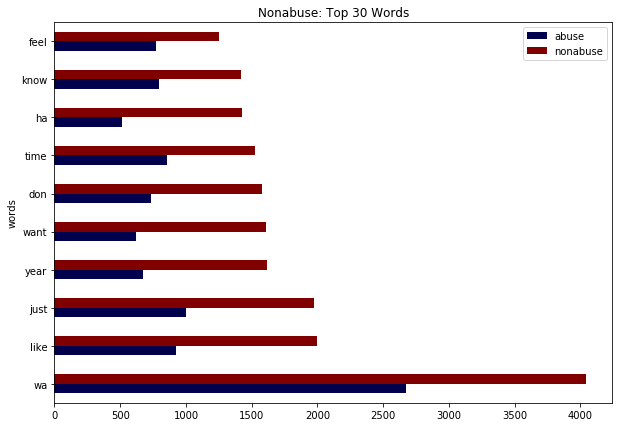

In [136]:
nonabuse_top30[:10].plot(x = "words", y = ["abuse", "nonabuse"], kind = "barh", title = "Nonabuse: Top 30 Words",  
                    figsize = (10, 7), colormap = "seismic")
plt.savefig("../visuals/nonabuse_top_30_words"); 